***Color manual***

<div class="alert alert-block alert-success">
<b>Green - Libraries</b>
</div>

<div class="alert alert-block alert-info">
<b>Blue - Information</b>
</div>

<div class="alert alert-block alert-danger">
<b>Red - Problems</b>
</div>

***

<div class="alert alert-block alert-success">
<b>import libraries</b>
</div>

In [1]:
import chart_studio
import pandas as pd
import seaborn as sns
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import matplotlib.dates as mdates

from plotly.subplots import make_subplots
from matplotlib.ticker import FuncFormatter

%matplotlib inline
sns.set_style('white')
chart_studio.tools.set_config_file(world_readable = True, sharing = 'public')

<div class="alert alert-block alert-info">
<b>Load data and see info</b>
</div>

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv')
df.date = pd.to_datetime(df.date)
df.set_index('date', inplace = True)
df.sort_index(inplace = True)
df.dtypes

country                             object
state                               object
city                                object
newDeaths                            int64
deaths                               int64
newCases                             int64
totalCases                           int64
deathsMS                             int64
totalCasesMS                         int64
deaths_per_100k_inhabitants        float64
totalCases_per_100k_inhabitants    float64
deaths_by_totalCases               float64
recovered                          float64
suspects                           float64
tests                              float64
tests_per_100k_inhabitants         float64
dtype: object

<div class="alert alert-block alert-info">
<b>Create Dataframe of only CE and all states inside Total</b>
</div>

In [3]:
print(df.state.unique())
df_CE = df[df.state == 'CE']
df_TOTAL = df[df.state == 'TOTAL']

['SP' 'TOTAL' 'RJ' 'BA' 'ES' 'DF' 'AL' 'MG' 'RS' 'GO' 'PE' 'PR' 'RN' 'SC'
 'AM' 'MS' 'SE' 'CE' 'AC' 'PA' 'PB' 'TO' 'PI' 'AP' 'MA' 'MT' 'RO' 'RR']


<div class="alert alert-block alert-info">
<b>Format the log scale to scalar</b>
</div>

In [4]:
#The two args are the value and tick position. Label ticks with the product of the exponentiation

def log_10_product(x, pos):
    return '%1i' % (x)

<div class="alert alert-block alert-info">
<b>Plot COVID-19 Situation in Brazil and Ceará (Matplotlib)</b>
</div>

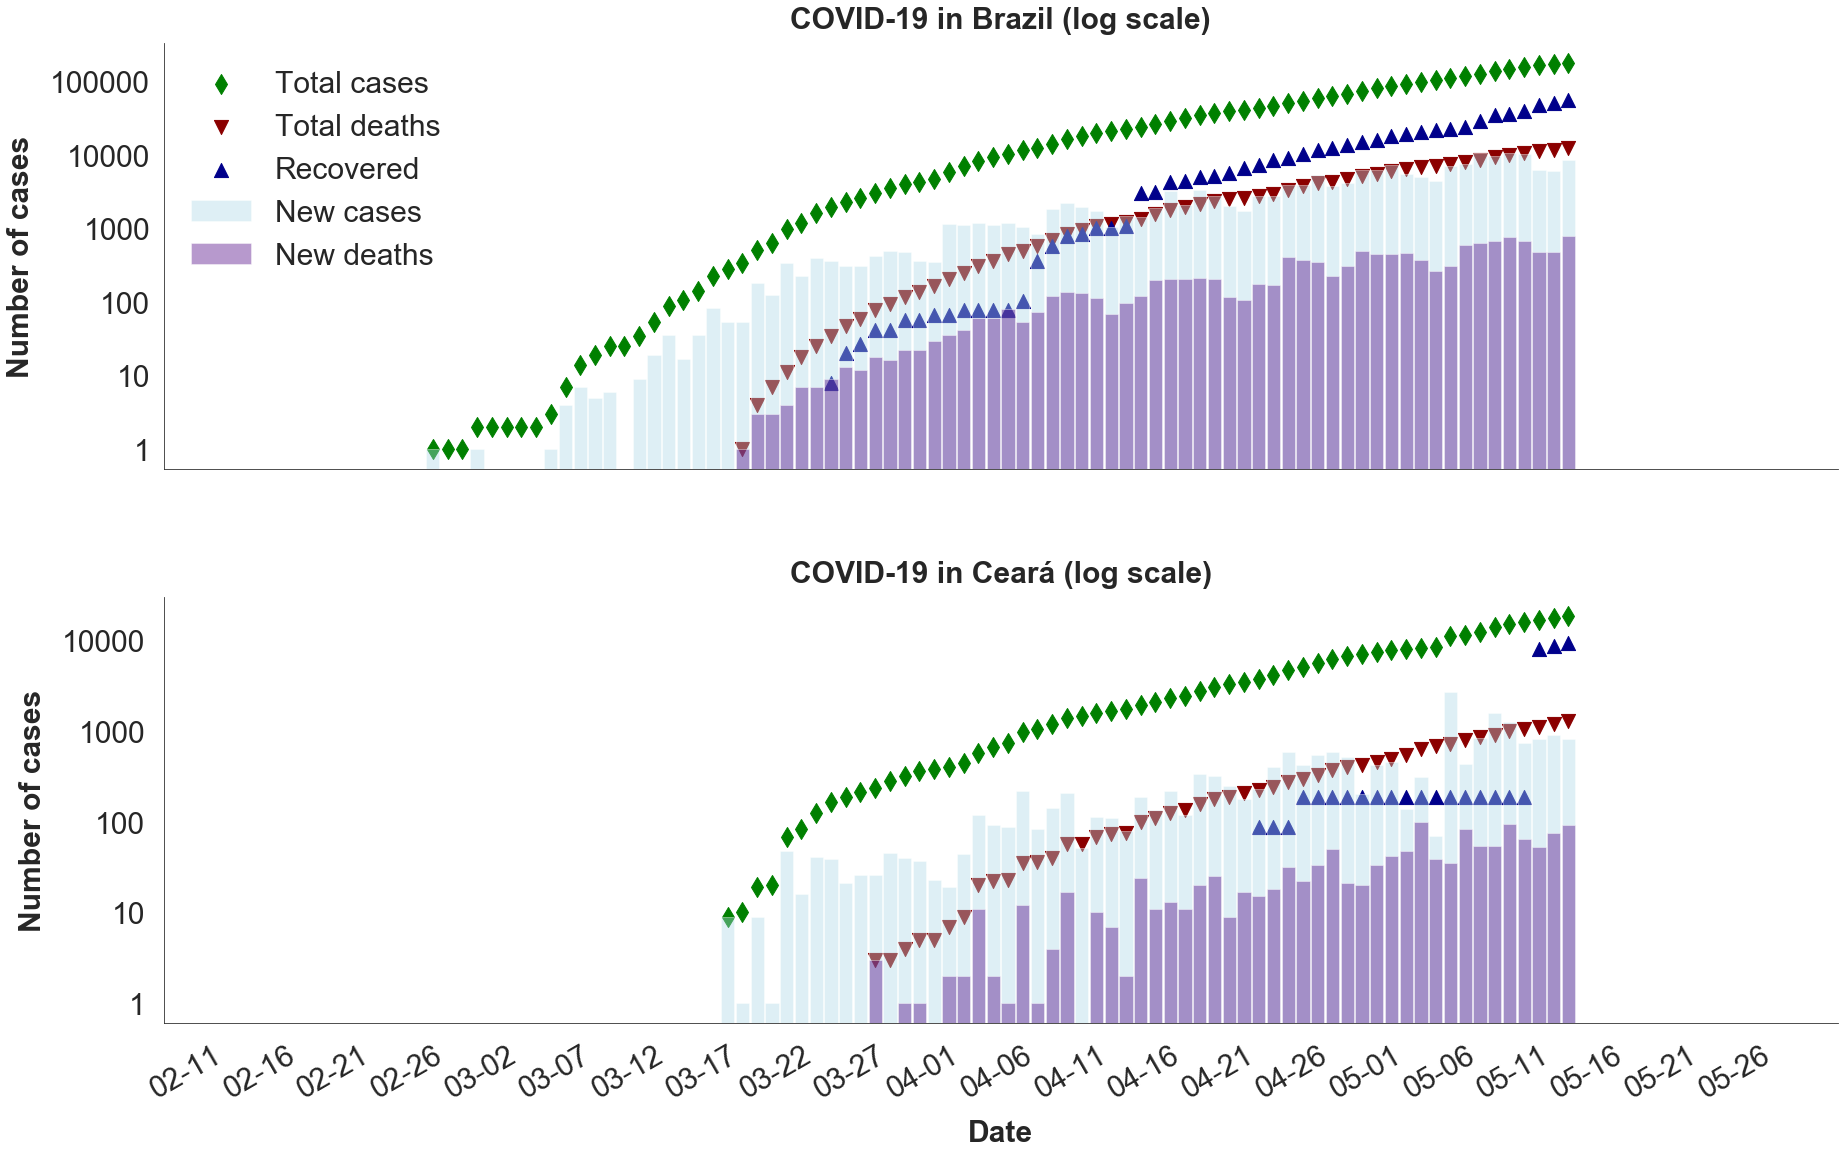

In [5]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (30,20), sharex = True)
plt.subplots_adjust(hspace = 0.3)

ax1.scatter(df_TOTAL.index, df_TOTAL.totalCases, label = 'Total cases', color = 'green', marker = 'd', s = 200)
ax1.scatter(df_TOTAL.index, df_TOTAL.deaths, label = 'Total deaths', color = 'darkred', marker = 'v', s = 200)
ax1.scatter(df_TOTAL.index, df_TOTAL.recovered, label = 'Recovered', color = 'darkblue', marker = '^', s = 200)
ax1.bar(df_TOTAL.index, df_TOTAL.newCases, label = 'New cases', color = 'lightblue', width = 0.9 , alpha = 0.4)
ax1.bar(df_TOTAL.index, df_TOTAL.newDeaths, label = 'New deaths', color = 'indigo', width = 0.9, alpha = 0.4)
ax1.set_title('COVID-19 in Brazil (log scale)', weight = 'bold', fontsize = 30, pad = 15)
ax1.set_ylabel('Number of cases', weight = 'bold', fontsize = 30,  labelpad = 15)
ax1.tick_params(labelsize = 30, length = 10)
ax1.legend(loc = 'upper left', prop = {'size':30}, frameon = False)
ax1.set_yscale('log')
formatter = FuncFormatter(log_10_product)
ax1.yaxis.set_major_formatter(formatter)

ax2.scatter(df_CE.index, df_CE.totalCases, color = 'green', marker = 'd', s = 200)
ax2.scatter(df_CE.index, df_CE.deaths, color = 'darkred', marker = 'v', s = 200)
ax2.scatter(df_CE.index, df_CE.recovered, label = 'Recovered', color = 'darkblue', marker = '^', s = 200)
ax2.bar(df_CE.index, df_CE.newCases, color = 'lightblue', width=0.9, alpha=0.4)
ax2.bar(df_CE.index, df_CE.newDeaths, color = 'indigo', width=0.9, alpha=0.4)
ax2.set_title('COVID-19 in Ceará (log scale)', weight = 'bold', fontsize = 30, pad = 15)
ax2.set_xlabel('Date', weight = 'bold', fontsize = 30, labelpad = 15)
ax2.set_ylabel('Number of cases', weight = 'bold', fontsize = 30,  labelpad = 15)
ax2.tick_params(labelsize = 30, length = 15)
ax2.set_yscale('log')
formatter = FuncFormatter(log_10_product)
ax2.yaxis.set_major_formatter(formatter)

plt.gcf().autofmt_xdate()
date_format = mdates.DateFormatter('%m-%d')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 5)) 
plt.gca().xaxis.set_major_formatter(date_format)

sns.despine()
plt.show()

<div class="alert alert-block alert-info">
<b>Plot COVID-19 Situation in Brazil and Ceará (Plotly)</b>
</div>

In [6]:
fig = make_subplots(rows = 2, cols = 1, shared_xaxes = True, subplot_titles = ('Brazil','Ceará'))

fig.add_trace(go.Scatter(x = df_TOTAL.index, y = df_TOTAL.totalCases, 
    name = 'Total cases in Brazil',
    legendgroup = 'Total cases',
    mode = 'markers',
    marker = dict(size = 10, symbol = 23),
    hovertemplate = 'Cases: %{y}',
    line = dict(color = 'rgb(255, 255, 0)')),
    row = 1, col = 1)

fig.add_trace(go.Scatter(x = df_TOTAL.index, y = df_TOTAL.deaths, 
    name = 'Total deaths in Brazil',
    legendgroup = 'Total deaths',
    mode = 'markers', 
    marker = dict(size = 10, symbol = 20),
    hovertemplate = 'Cases: %{y}',
    line = dict(color = 'rgb(255, 0, 0)')),
    row = 1, col = 1)

fig.add_trace(go.Scatter(x = df_TOTAL.index, y = df_TOTAL.recovered, 
    name = 'Recovered in Brazil',
    legendgroup = 'Recovered',
    mode = 'markers', 
    marker = dict(size = 10, symbol = 19),
    hovertemplate = 'Cases: %{y}',
    line = dict(color = 'rgb(0, 255, 0)')),
    row = 1, col = 1)

fig.add_trace(go.Bar(x = df_TOTAL.index, y = df_TOTAL.newCases, 
    name = 'New cases in Brazil',
    legendgroup = 'New cases',
    hovertemplate = 'Cases: %{y}',
    marker_color = 'rgba(180, 210, 255, 0.9)'),
    row = 1, col = 1)

fig.add_trace(go.Bar(x = df_TOTAL.index, y = df_TOTAL.newDeaths, 
    name = 'New deaths in Brazil',
    legendgroup = 'New deaths',
    hovertemplate = 'Cases: %{y}',
    marker_color = 'rgba(200, 180, 225, 0.9)'),
    row = 1, col = 1)

fig.add_trace(go.Scatter(x = df_CE.index, y = df_CE.totalCases, 
    name = 'Total cases in Ceará',
    legendgroup = 'Total cases',
    mode = 'markers',
    marker = dict(size = 10, symbol = 23),
    hovertemplate = 'Cases: %{y}',
    line = dict(color = 'rgb(255, 255, 0)')),
    row = 2, col = 1)

fig.add_trace(go.Scatter(x = df_CE.index, y = df_CE.deaths, 
    name = 'Total deaths in Ceará',
    legendgroup = 'Total deaths',
    mode = 'markers',
    marker = dict(size = 10, symbol = 20),
    hovertemplate = 'Cases: %{y}',
    line = dict(color = 'rgb(255, 0, 0)')),
    row = 2, col = 1)

fig.add_trace(go.Scatter(x = df_CE.index, y = df_CE.recovered, 
    name = 'Recovered in Ceará',
    legendgroup = 'Recovered',
    mode = 'markers', 
    marker = dict(size = 10, symbol = 19),
    hovertemplate = 'Cases: %{y}',
    line = dict(color = 'rgb(0, 255, 0)')),
    row = 2, col = 1)

fig.add_trace(go.Bar(x = df_CE.index, y = df_CE.newCases, 
    name = 'New cases in Ceará',
    legendgroup = 'New cases',
    hovertemplate = 'Cases: %{y}',
    marker_color = 'rgba(180, 210, 255, 0.9)'),
    row = 2, col = 1)

fig.add_trace(go.Bar(x = df_CE.index, y = df_CE.newDeaths, 
    name = 'New deaths in Ceará',
    legendgroup = 'New deaths',
    hovertemplate = 'Cases: %{y}',
    marker_color = 'rgba(200, 180, 225, 0.9)'),
    row = 2, col = 1)

fig.update_layout(yaxis_type = 'log',
    yaxis2_type = 'log',
    xaxis2_tickformat = '%d %B',
    title_text = 'COVID-19 Evolution (log scale)', 
    title_x = 0.01,
    title_y = 0.99,
    autosize = True,
    barmode = 'group',
    bargap = 0.2, 
    bargroupgap = 0.2,
    legend = dict(
    x = 1, y = 1),
    xaxis2_title = 'Date',
    yaxis_title = 'Number of cases',
    yaxis2_title = 'Number of cases',
    paper_bgcolor = 'rgba(1,1,1,1)',
    plot_bgcolor = 'rgba(1,1,1,1)',
    hoverlabel = dict(
    bgcolor = 'white',
    font_color = 'black',
    font_size = 15, 
    font_family = 'Helvetica'),
    font = dict(
    family = 'Helvetica, Helvetica',
    size = 15,
    color = 'white'))

fig.update_xaxes(ticks = 'outside', 
                 tickwidth = 2, 
                 tickcolor = 'black', 
                 ticklen = 10,
                 showgrid = False,
                 zeroline = False,
                 row = 1, col = 1)

fig.update_yaxes(dtick = 1,
                 ticks = 'outside', 
                 tickwidth = 2, 
                 tickcolor = 'black', 
                 ticklen = 10,
                 showgrid = False,
                 zeroline = False,
                 row = 1, col = 1)

fig.update_xaxes(tickangle = 315,
                 ticks = 'outside', 
                 tickwidth = 2, 
                 tickcolor = 'black', 
                 ticklen = 10,
                 showgrid = False,
                 zeroline = False,
                 row = 2, col = 1)

fig.update_yaxes(dtick = 1,
                 ticks = 'outside', 
                 tickwidth = 2, 
                 tickcolor = 'black', 
                 ticklen = 10,
                 showgrid = False,
                 zeroline = False,
                 row = 2, col = 1)

py.iplot(fig, filename = 'COVID-19 in Brazil and Ceará', auto_open = False)